<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data
<br><br>
_Instructor:_ Tim Book, General Assembly DC

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [56]:
# Use .head() to show first 5 rows of dataset, just to show that the data got imported correctly
imdb_file = './data/imdb_1000.csv'
movies = pd.read_csv(imdb_file)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### What are the number of rows and columns?

In [57]:
# Answer:
# '.shape' returns tuple(rows, columns) for representation
rows, columns = movies.shape
print('Number of rows: ', rows, '\nNumber of columns: ', + columns)

Number of rows:  979 
Number of columns:  6


#### What are the data types of each column?

In [58]:
# Answer:
# returns a pandas series with column labels and their pandas datatypes
# float64 = float (64-byte)
# object = string
# int64 = integer (64-byte)
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [59]:
# Answer:
# grab the 'duration' column and use the '.mean()' function
print('Average movie length: ', movies['duration'].mean())
print('Median movie length: ', movies['duration'].median()) # Just for fun

Average movie length:  120.97957099080695
Median movie length:  117.0


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [60]:
# Answer:
# use '.concat()' to be able to present them as a single DF - longest on top
pd.concat([movies.sort_values('duration', ascending=False).head(1), # Longest
movies.sort_values('duration', ascending=False).tail(1)]) # Shortest

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

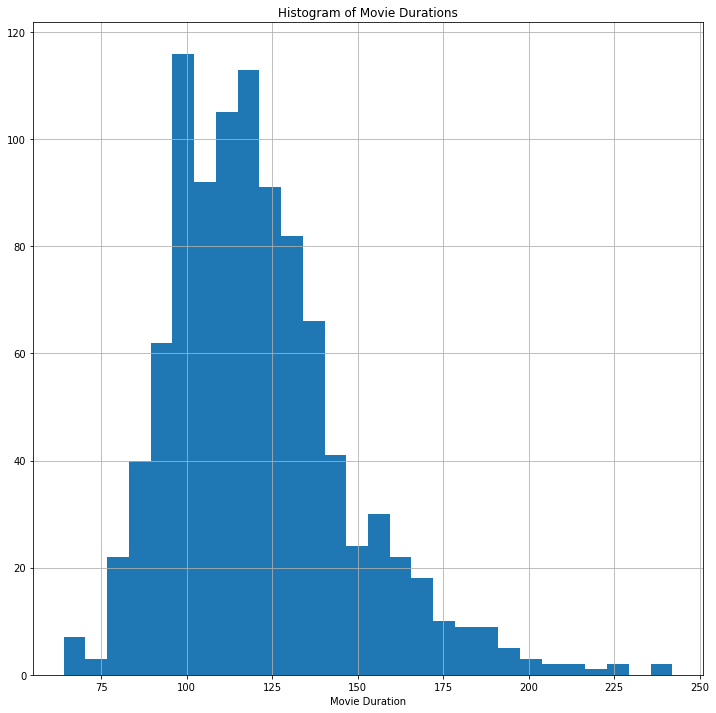

In [61]:
# Answer:
# Use the '.hist()' function.  use the duration column as the input
# Use the 'auto' bin generation from Class
# increase figure size 'figsize' for better viewing
movies.hist('duration', bins='auto', figsize = (12, 12))
# use 'plt.xlabel()' and 'plt.title()' for figure labeling
plt.xlabel('Movie Duration')
plt.title('Histogram of Movie Durations');

#### Use a box plot to display that same data.

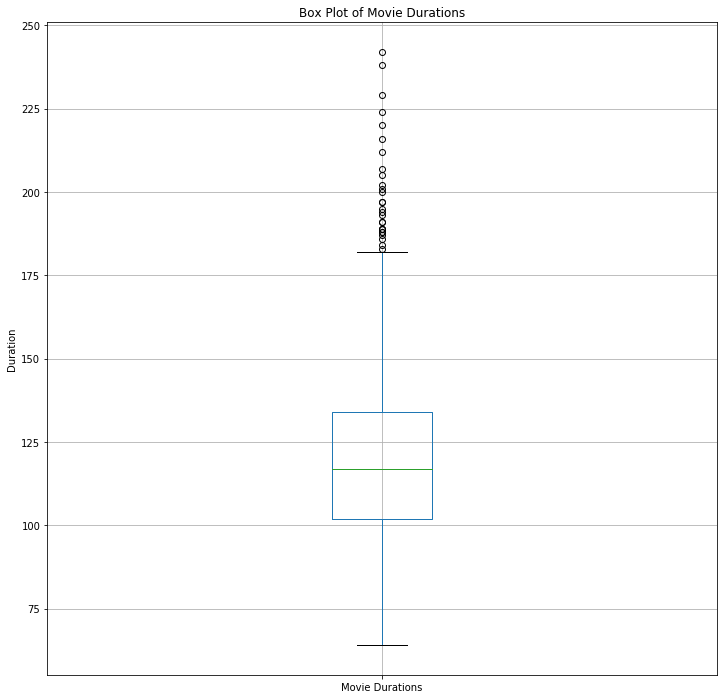

In [62]:
# Answer:
# use '.boxplot()' with 'duration' column to accomplish this. increase figure size for better
# viewing
movies.boxplot('duration', figsize = (12, 12));
# Use '.xticks()' for box label.  Function from:
# https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
plt.xticks([1], ['Movie Durations'])
# 'plt.ylabel' and 'plt.title' for labeling
plt.ylabel('Duration')
plt.title('Box Plot of Movie Durations');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [63]:
# Answer:
# '.value_counts()' counts the sum of each unique value encountered in the 'content_rating' column
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

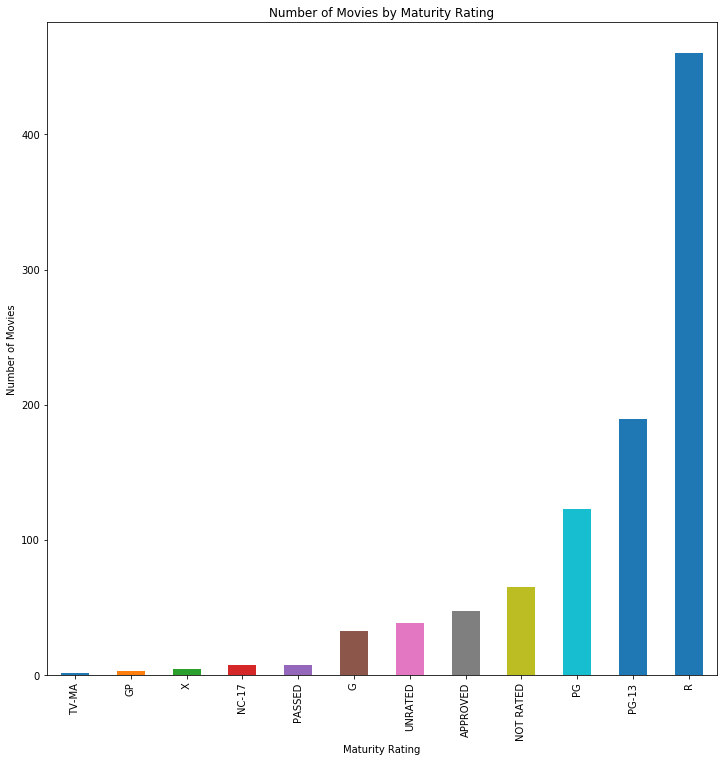

In [64]:
# Answer:
# Using '.sort_values()' to quickly show relative amounts
# 'Using 'kind = 'bar'' attribute to generate a vertical bar graph'
# Increase figure size for easier viewing
# Using Python behavior to break this code into multiple lines for easier reading
movies['content_rating'].value_counts().sort_values().plot(
    kind = 'bar', figsize = (12, 12));
# use the 'plt.title()', 'plt.xlabel()', and 'plt.ylabel()' functions 
# to label graph as requested
plt.title('Number of Movies by Maturity Rating')
plt.xlabel('Maturity Rating')
plt.ylabel('Number of Movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [65]:
# Answer:
# use 'isin()' function to find all movie rows with the appropriate markings to change
# to 'UNRATED'
# create a list of the items to look for to pass into the '.isin()' function
unrated_list = ['NOT RATED', 'APPROVED', 'PASSED', 'GP'] # List
unrated_criteria = movies['content_rating'].isin(unrated_list)
# use the '.loc' function to apply the findings from the '.isin()' function and grab the
# content ratings column to change all of the appropriate values at once
movies.loc[unrated_criteria, 'content_rating'] = "UNRATED"
# use the '.head()' function to show that the change took appropriately
movies.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [66]:
# Answer: 
# Use different filterning logic from class for fun
# use the '.replace()' function on the content ratings column.
# used Shift-Tab on the '.replace()' function to determine variable names
# & successfully tested adding multiple 'to_replace' values as a list
movies['content_rating'].replace(to_replace = ['X', 'TV-MA'], value = 'NC-17', inplace = True)
# Get a count of all present content ratings to verify that the data changed appropriately
# (i.e. that there are no entries with the content rating of 'X' or 'TV-MA')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [67]:
# Answer:
# Use the '.isnull()' function and sum the result as discussed in class
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [68]:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [69]:
# Looking at the actual NA values and the associated Movies - find that they
# are in fact empty strings
movie_nulls = pd.read_csv(imdb_file, na_filter=False)
movie_nulls[movie_nulls['title'].isin(['Butch Cassidy and the Sundance Kid', 
                                       'Where Eagles Dare', 'True Grit'])]['content_rating']

187         
649         
662    PG-13
936         
Name: content_rating, dtype: object

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [70]:
# Answer: 
# Since there are only missing 3 values in 'content_rating', we can look up those ratings
# and fill them in
# ratings from IMDb website: https://www.imdb.com/title/tt0064115/
# https://www.imdb.com/title/tt0065207/
# https://www.imdb.com/title/tt0065126/
# Two of the movies are 'PG', can do those at the same time
movies.loc[(movies['content_rating'].isnull()) & 
           (movies['title'].isin(['Butch Cassidy and the Sundance Kid', 'Where Eagles Dare'])), 
           'content_rating'] = 'PG'
# The last one ('True Grit (1969)') needs to be taken care of separately
movies.loc[movies['content_rating'].isnull(), 'content_rating'] = 'G'
# Check that the data changed appropriately and that there are no longer nulls in the dataset
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [71]:
# Look at the specific titles again to verify that they have the correct ratings
movies[movies['title'].isin(['Butch Cassidy and the Sundance Kid', 
                             'Where Eagles Dare', 'True Grit'])]['content_rating']

187       PG
649       PG
662    PG-13
936        G
Name: content_rating, dtype: object

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [72]:
# Answer:
# Use logic to grab movies that match the two duration classifications as two series
# .describe() to get extra data.  Could use '.mean()' to just get the averages
# Use 'pd.concat()' to combine the two series to look at the two side-by-side.
# Use 'axis = 1' to combine them properly along the rows
rating_info = pd.concat([movies[movies['duration'] >= 120]['star_rating'].describe(), 
           movies[movies['duration'] < 120]['star_rating'].describe()], axis = 1)
# change the column names to be more appropriate
rating_info.columns = ['star_ratings_long', 'star_ratings_short']
# Display the resulting dataframe
rating_info

,star_ratings_long,star_ratings_short
count,454.000000,525.000000
mean,7.948899,7.838667
std,0.362705,0.302361
min,7.400000,7.400000
25%,7.700000,7.600000
50%,7.900000,7.800000
75%,8.200000,8.000000
max,9.300000,8.900000


#### Use a visualization to detect whether there is a relationship between duration and star rating.

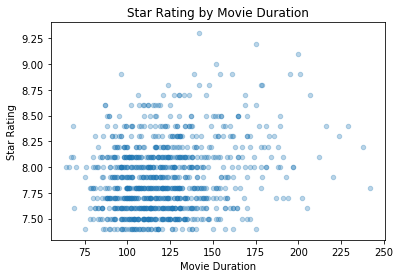

In [73]:
# Answer:
# Create a scatter plot to show this relationship
# Documentation on scatter plots from:
# https://pandas.pydata.org/pandas-docs/stable/visualization.html
# grab the 'duration' and 'star_rating' data, and use them as the x and y axes respectively
# Using the 'alpha' parameter from class to show datapoints that are stacked on top
movies.loc[:,['duration', 'star_rating']].plot(x='duration', y='star_rating', kind = 'scatter', alpha=0.3);
# use the 'plt.title()', 'plt.xlabel()', and 'plt.ylabel()' functions 
# to label graph appropriately
plt.title('Star Rating by Movie Duration')
plt.xlabel('Movie Duration')
plt.ylabel('Star Rating');

In [74]:
# There doesn't appear to be a real correlation here

#### Calculate the average duration for each genre.

In [75]:
# Answer:
# use the '.groupby()' to get genre-specific data,
# and take the '.mean()' of the 'duration' column
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

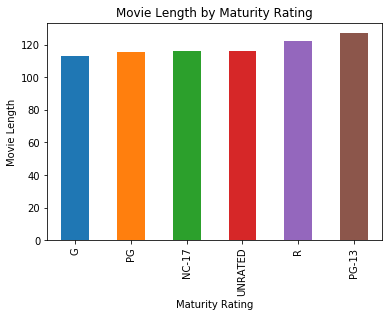

In [76]:
# Answer:
# Use the '.groupby()' function as above with the 'content_rating' groupings
# Get the average movie-lengths for each 'content_rating' category
# Sort these ratings groups by movie-duration length and plot this
# data as a vertical bar plot
movies.groupby('content_rating')['duration'].mean().sort_values().plot(
    kind='bar');
# use the 'plt.title()', 'plt.xlabel()', and 'plt.ylabel()' functions 
# to label graph appropriately
plt.title('Movie Length by Maturity Rating')
plt.xlabel('Maturity Rating')
plt.ylabel('Movie Length');

#### Determine the top rated movie (by star rating) for each genre.

In [77]:
# Answer:
# Use the '.groupby()' command with the '.max()' command to get the
# maximum star ratings for each genre
max_rating = movies.groupby('genre')['star_rating'].max()
print(max_rating)
# Determine the index of the maximum star ratings for each genre using thhe '.idxmax()'
# command.  Found documentation for this command at:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
max_index = movies.groupby('genre')['star_rating'].idxmax()
print(max_index)
# Grab the genre, title, and rating of each movie determined by the previous code
# using the '.loc' attribute.
# Verify the results against the maximum-ratings data found in the first line of code
movies.loc[max_index, ['genre','title', 'star_rating']]

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64
genre
Action         3
Adventure      7
Animation     30
Biography      8
Comedy        25
Crime          0
Drama          5
Family       468
Fantasy      638
Film-Noir    105
History      338
Horror        39
Mystery       38
Sci-Fi       145
Thriller     350
Western        6
Name: star_rating, dtype: int64


,genre,title,star_rating
3,Action,The Dark Knight,9.0
7,Adventure,The Lord of the Rings: The Return of the King,8.9
30,Animation,Spirited Away,8.6
8,Biography,Schindler's List,8.9
25,Comedy,Life Is Beautiful,8.6
0,Crime,The Shawshank Redemption,9.3
5,Drama,12 Angry Men,8.9
468,Family,E.T. the Extra-Terrestrial,7.9
638,Fantasy,The City of Lost Children,7.7
105,Film-Noir,The Third Man,8.3


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [78]:
# Answer:
# Use '.loc' with the '.duplicated()' function
# from the EDA lecture to determine duplicated titles
print('Movies with the same title: ')
print(movies.loc[movies.duplicated(['title']), ['title']], '\n')
# Use the '.duplicated()' function on the whole dataframe to see if there are any 
# fully-duplicated rows
# since the '.duplicated()' returns booleans, the '.sum()' will show the number of duplicates in
# the data
print('Number of duplicate rows in dataset = ',movies.duplicated().sum(), '\n')
# To verify, print all rows that have the duplicated titles - they are indeed different versions
# of the same movies
print('Comparison of duplicate-title rows: ')
movies[movies['title'].isin(['Dracula', 'Les Miserables', 'True Grit', 'The Girl with the Dragon Tattoo'])]\
.sort_values(by = ['title'])

Movies with the same title: 
                               title
482  The Girl with the Dragon Tattoo
905                          Dracula
924                   Les Miserables
936                        True Grit 

Number of duplicate rows in dataset =  0 

Comparison of duplicate-title rows: 


,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: automatically create a list of relevant genres by saving the value_counts and then filtering

In [79]:
# Answer:
# Version 1 - This is the version that I came up with without doing any research
# As stated in this problem option, save the list of value_counts of gneres and show them
value_counts = movies['genre'].value_counts()
print('Number of movies in each genre: \n', value_counts, '\n')
# Grab the indeces of the previous series that have at least 10 movies (value_counts > 9)
# and show these
genre_index = value_counts[value_counts > 9].index
print('Genres with at least 10 movies: \n', genre_index, '\n')
# Use the previous listing with the '.isin()' function to get all relevant genres and
# display their average star-ratings
print('Average Ratings of qualifying genres:')
print(movies[movies['genre'].isin(genre_index)].groupby('genre')['star_rating'].mean(), '\n')

# Version 2: Using the '.filter()' command reference from: 
# https://stackoverflow.com/questions/29836836/how-do-i-filter-a-pandas-dataframe-based-on-value-counts
# I chose to apply this here because it is cleaner than my code above, but felt it was too much of 
# a 'copy-and-paste' solution to present without my own alternative solution above
# Producing the results also allowed me to verify results against each other for both solutions
# The filter function allows the use of a function to automatically and more cleanly
# filter relevant movies and then get the averages of their star ratings
print('Again, average ratings of qualifying genres:')
movies.groupby('genre').filter(lambda genre: len(genre) > 9).groupby('genre')['star_rating']\
.mean()

Number of movies in each genre: 
 Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64 

Genres with at least 10 movies: 
 Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object') 

Average Ratings of qualifying genres:
genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64 

Again, average ratings of qualifying genres:


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: aggregate by count and mean, then filter using the count

In [80]:
# Answer:
# use the '.agg()' function from class to get the averages and counts of all star
# ratings for each genre (aided by using the '.groupby' command)
agg_movies = movies.groupby('genre')['star_rating'].agg(['count', 'mean'])
# Use '.loc' as the more proper way to index the aggregated data structure,
# grabbing the genres with at least 10 (> 9) ratings, and their corresponding averages
agg_movies.loc[agg_movies['count'] > 9, 'mean']

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: mean, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [81]:
# Bonus Questions: 
# 1. Determine which actors have appeared in the most movies
# 2. Determine the Actors with the highest ratings of films (of actors that have appeared in at 
#    least 5 films)
# First, create a function to remove unwanted characters from actor names so I can
# make a list of actors for each movie

# After evaluating the 'actor_list' column I found that
# they were strings with extraneous characters: 
#    [,],',", extra whitespace ( )'s, and extra u's 

# Step 1: remove the special characters. whitespaces and u's are more complicated
# if an of the special characters are in a given string, remove it i.e. 'replace'
# it with ''.  
# Note: the '\"' in the 'chars' string is in order to escape the "
# so it doesn't end the 'chars' string early
def remove_chars(string, chars = "[]'\""):
        for c in string:
            if c in chars:
                string = string.replace(c,'')
# Step 2, remove extra whitespaces and u's. This is tricky because the .replace()
# function replaces ALL instances of a character, we only want to get rid of the u's and 
# whitespaces in front of Actors' names, so we need to be able to remove those characters 
# from specific indeces
# Idea for how to delete chars from specific indeces from:
# Inspiration for removing characters from specific dataframe indeces from:
# https://stackoverflow.com/questions/14198497/remove-char-at-specific-index-python

        # the 'count' makes sure that we stop evaluating after the 3rd time.
        # This is because only 3 actors are listed per movie so there are only three
        # extra u's and spaces that we care about per input
        count = 0
        while count < 3:
            # index safely along input string with range(len())
            for i in range(len(string)):
                # If we encounter a space (' ') and it's preceding character is a ','
                # then it isn't a space between an actor's first name and last
                # name, and we can delete it
                if string[i] == ' ' and string[i - 1] == ',':
                    # accomplish this by adding together the two portions of the string
                    # around the character in question, leaving out the unwanted character
                    # itself
                    string = string[:i] + string[i+1:]
                    # For 'u', if the character appears immediately in front of an upper-case
                    # letter, then we know that it isn't part of the actor's actual name
                    # and we can remove it
                if string[i] == 'u' and string[i + 1] == string[i + 1].upper():
                    string = string[:i] + string[i+1:]
                    count += 1
                    # have to break so we can update the count and start over with the new-lenth
                    # string
                    break
        return string

In [82]:
# create a new column for our new actor lists, which we fill by using the 'apply()' function
# to feed the 'remove_chars' function defined above to every entry of the 'actors_list'
# column.
# Then create a list by splitting the clean string by ','
# This is why we also had to remove the extra spaces, so they wouldn't be in actors
# names after this step, potentially causing a mismatch of name strings in later
# evaluation
movies['actors_sep'] = movies['actors_list'].apply(remove_chars).str.split(',')

In [83]:
# Next, for easier per-actor analysis, we are creating a new dataframe that has duplicates
# of all existing rows for each actor listed for the movie
# effectively making a DF that has 3x as many rows as the original
# so we can correlate specific actors to the movie evaluations

# Create an empty dataframe with the same columns as the original movies dataframe
movies_expand = pd.DataFrame(columns = movies.columns)
# verify that I have an empty datagram with the correct columns
movies_expand

,star_rating,title,content_rating,genre,duration,actors_list,actors_sep


In [84]:
# Create a function that takes in a dataframe and 'expands' it as desired to have a new duplicate row for every actor
# list per movie. and returns the expanded dataframe
# '.append()' from 
def expand_row(df_orig, col = 'actors_sep', df = movies_expand):
    # Iterate through the rows of the dataframe.  '.iterrows()' command from:
    # https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
    for index, row in df_orig.iterrows():
        # For every actor in the actor list of the dataframe, make a new row that is a copy
        # of the old one with the actor-list column being replaced by the actor in question
        # '.repeat()' series function from:
        # https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.repeat.html
        for item in row[col]:
            new_row = row.repeat(1)
            new_row[col] = item
            # Then add it to the new dataframe to be returned using the '.append()' method.
            # Found at: 
            #https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it 
            df = df.append(new_row, ignore_index = True)
    return df

In [85]:
# assign the empty dataframe to the output of the function defined above with the chosen column 
# and the original movies dataframe as inputs
movies_expand = expand_row(movies, 'actors_sep', movies_expand)
# After the expansion takes place, turn the list column back into a string so that other sorting 
# options can still take place later (lists are not hashable)
movies['actors_sep'] = movies['actors_sep'].astype(str)
# Verify that the expanded dataframe comes out as desired with extra rows per movie with one actor
# listed in each row
movies_expand

,star_rating,title,content_rating,genre,duration,actors_list,actors_sep
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Tim Robbins
1,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Morgan Freeman
2,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Bob Gunton
3,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Marlon Brando
4,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Al Pacino
5,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",James Caan
6,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Al Pacino
7,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Robert De Niro
8,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Robert Duvall
9,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",Christian Bale


In [86]:
# Bonus Question 1: Determine whih actors have appeared in the most films

# Group the new dataframe by actor name and get the number of items in each grouping using
# the .size() method
# '.size()' from: 
# https://stackoverflow.com/questions/19384532/
#    how-to-count-number-of-rows-per-group-and-other-statistics-in-pandas-group-by
# Finally sort by values in descending order and get the top 5 (to show that it worked)
movies_expand.groupby('actors_sep').size().sort_values(ascending = False).head()

actors_sep
Robert De Niro    18
Tom Hanks         14
Brad Pitt         14
Clint Eastwood    14
Al Pacino         13
dtype: int64

In [87]:
# Bonus Question 2: What are the actors with highest rated films

# Use the same logic from Option 2 of the final question to aggregate the counts of the actors
# appearances and their average star ratings
# Then filter such that only actors that have been in at least 5 movies are evaluated
# and sort those actors based on their average movie star ratings.
# Return the top 10 highest-rated actors
agg_movies = movies_expand.groupby('actors_sep')['star_rating'].agg(['count', 'mean'])
agg_movies.loc[agg_movies['count'] > 4, 'mean'].sort_values(ascending = False).head(10)

actors_sep
Charles Chaplin    8.480000
Aamir Khan         8.400000
Elijah Wood        8.300000
Kevin Spacey       8.266667
Ian McKellen       8.200000
Paul Newman        8.200000
James Stewart      8.190000
William Holden     8.166667
Harrison Ford      8.140000
Humphrey Bogart    8.128571
Name: mean, dtype: float64